# <b>SuperStore: Customer Segmentation Using RFM Analysis</b>

## 1. Context and Problem Statement

### 1.1. Context

SuperStore is a <b>global retail company</b>, offers a wide variety of products, including <b>groceries, household goods, electronics, clothing, and more.</b>

On the occasion of Christmas and New Year, the Marketing department wants to <b>launch customer appreciation campaigns and exploit potential customer groups</b>. However, because the data this year is too large, it is not possible to manually segment as before.

The Data Analysis department is asked to support customer segmentation, using the <b>RFM model</b>. Previously, the team could do it on Excel, but now it is necessary to build an automatic segmentation process using Python to accommodate large data volumes.

### 1.2. Problem Statement



*   Build an RFM-based customer segmentation
*   Segment into 11 RFM segments: Champions, Loyal, Potential Loyalists, New Customers, Promising, Need Attention, About To Sleep, At Risk, Cannot Lose Them, Hibernating, Lost
*   Advice for Marketing & Sales: which groups to focus on, and which metrics to base on (R/F/M)
*   Additional analysis into customer segments insights
*   Recommendations on how to launch marketing campaign to the right customer segment



## 2. Data Understanding

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique **all-occasion gifts**. Many customers of the company are wholesalers.

| Column      | Description |
| ----------- | ----------- |
| InvoiceNo   | Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation.|
| StockCode   | Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.|
| Description | Product (item) name. Nominal.|
| Quantity    | The quantities of each product (item) per transaction. Numeric.|
| InvoiceDate |Invoice Date and time. Numeric, the day and time when each transaction was generated.|
| UnitPrice   |Numeric, Product price per unit in sterling.|
|CustomerID   |Nominal, a 5-digit integral number uniquely assigned to each customer.|
|Country      | Country name. Nominal, the name of the country where each customer resides.|



## 3. EDA

**EDA Process Summary**

**Load data:** The data covers over 541,000 transaction lines from 2010 to 2011, belonging to an online retail company primarily operating in the UK.

**Check data type:**
* Change ['CustomerID'] from float to int
* Identify 2 columns with abnormal values (['Quantity'] and ['UnitPrice'] < 0) --> Most of the negative ['Quantity'] values ​​belong to canceled orders, so it is necessary to classify successful orders and canceled orders. There are only 2 rows where ['UnitPrice'] < 0.

**Identify missing values**: There are missing values in 2 columns: ['CustomerID'] & ['Description'] --> drop missing in ['CustomerID'], ignore ['Description'].

**Identify duplicates**: 5192 duplicates found --> drop






#### Import Packages

In [1]:
! pip install pandas-profiling
! pip install pydantic-settings
! pip install ydata_profiling
! pip install squarify

import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import squarify #(algorithm for treemap)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 18.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a10d131acd6335dc3493f6ea961bd26e40dbcf89bc52b8e8ed3b13b0a5cc09ff
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: 

#### Load Data

In [2]:
ecom_raw = pd.read_excel('/content/ecommerce retail.xlsx')
ecom_raw.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

####Check Data Types and Data Values

In [3]:
# check data types
ecom_raw.info()
ecom_raw.describe(include='all')

#convert customerID to integer
ecom_raw['CustomerID'] = ecom_raw['CustomerID'].astype('Int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
profile = ProfileReport(ecom_raw, title="Ecom Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:05<00:00,  1.47it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Nhận xét:
 - Nhận thấy hai giá trị bất thường tại cột Quantity và UnitPrice (<0)

#### Phân loại đơn hàng cancel


In [5]:
# create check_cancel to column to define cancel invoice
ecom_raw['check_cancel'] = ecom_raw['InvoiceNo'].astype('str').apply(lambda x: True if x[0] == 'C' else False)

# filter cancel invoice
cancel_inv = ecom_raw[ecom_raw['check_cancel'] == True]
print('cancel invoices shape: ' + str(cancel_inv.shape))
print('')

# check if cancel invoice have quantity > 0 --> All cancel invoices have minus quantity
print('cancel invoices with Quantity>0')
print(cancel_inv[cancel_inv['Quantity']>0].shape)
print('')

# check if Price < 0 in cancel invoice --> no cancel invoice have abnormal Price values
print('cancel invoices with Price<0')
print(cancel_inv[cancel_inv['UnitPrice']<0].shape)



cancel invoices shape: (9288, 9)

cancel invoices with Quantity>0
(0, 9)

cancel invoices with Price<0
(0, 9)


#### Detect lý do các giá trị abnormal

In [6]:
# filter completed invoice
compl_inv = ecom_raw[ecom_raw['check_cancel'] == False]
print('completed invoices shape: ' + str(compl_inv.shape))
print('')

print('Detect các dòng có cột Quantity < 0')
print(compl_inv[compl_inv['Quantity'] < 0].shape)
print('')

print('Check lý do Quantity < 0 có phải do CustomerID null không')
print(compl_inv[(compl_inv['Quantity']<0) & (compl_inv['CustomerID'].isna())].shape)
print('')
# --> tất cả các giá trị bất thường Quantity < 0 trong các completed invoice đều liên quan tới CustomerID null!

# detect Price < 0
print('Detect các dòng có cột Price < 0')
print(compl_inv[compl_inv['UnitPrice'] < 0])
print('')
# --> chỉ có hai invoice ghi nhận Price < 0 và thuộc về CustomerID null

completed invoices shape: (532621, 9)

Detect các dòng có cột Quantity < 0
(1336, 9)

Check lý do Quantity < 0 có phải do CustomerID null không
(1336, 9)

Detect các dòng có cột Price < 0
       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  check_cancel  
299983  -11062.06        <NA>  United Kingdom         False  
299984  -11062.06        <NA>  United Kingdom         False  



Hướng xử lý abnormal values: Remove các dòng Quantity, UnitPrice < 0 trong các non-cancel invoice, vì chúng thuộc về các CustomerID null, không mang nhiều giá trị phân tích.

In [7]:
# Filter các invoice không bị cancel, có quantity và price > 0
compl_inv_clean = compl_inv[(compl_inv['Quantity']>=0) & (compl_inv['UnitPrice']>=0)]
print(compl_inv_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 531283 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     531283 non-null  object        
 1   StockCode     531283 non-null  object        
 2   Description   530691 non-null  object        
 3   Quantity      531283 non-null  int64         
 4   InvoiceDate   531283 non-null  datetime64[ns]
 5   UnitPrice     531283 non-null  float64       
 6   CustomerID    397924 non-null  Int64         
 7   Country       531283 non-null  object        
 8   check_cancel  531283 non-null  bool          
dtypes: Int64(1), bool(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 37.5+ MB
None


#### Handling Missing Values

In [8]:
print(compl_inv_clean.isnull().sum())
print('')
print(compl_inv_clean.isnull().mean().sort_values(ascending=False))

InvoiceNo            0
StockCode            0
Description        592
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      133359
Country              0
check_cancel         0
dtype: int64

CustomerID      0.251013
Description     0.001114
InvoiceNo       0.000000
Quantity        0.000000
StockCode       0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
check_cancel    0.000000
dtype: float64


CustomerID has **25,1% missing values**. However, null CustomerID bring no insights to RFM model --> I will split the dataset into null and non-null customerID. Later, I will check if null IDs have great contribution to company's revenue or not.

In [9]:
#subset null customerID
null_customerID = compl_inv_clean[compl_inv_clean['CustomerID'].isna()]
print(null_customerID.shape)

(133359, 9)


In [10]:
#subset cleaned completed invoice with non-null customerID
invoice_clean = compl_inv_clean.dropna(subset=['CustomerID']).reset_index(drop=True)
invoice_clean.shape

(397924, 9)

#### Checking Duplicates

In [11]:
#check dups on invoice_clean
print(invoice_clean.duplicated().sum())
print(invoice_clean[invoice_clean.duplicated(keep=False)].head(10))


5192
    InvoiceNo StockCode                        Description  Quantity  \
476    536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
480    536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
485    536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
508    536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
512    536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
518    536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
528    536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
530    536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
539    536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
546    536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   

            InvoiceDate  UnitPrice  CustomerID         Country  check_cancel  
476 2010-12-01 11:45:00       4.95       17908  United Kingdom         False  
480 2010-12-01 11:45:00       2.10       179

In [12]:
# drop duplicates
invoice_clean = invoice_clean.drop_duplicates()
print(invoice_clean.shape)
print('')
print(invoice_clean.head())

(392732, 9)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  check_cancel  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom         False  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom         False  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom         False  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom         False  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom         False  


In [13]:
profile_clean = ProfileReport(invoice_clean, title="Invoice Profiling Report")
profile_clean

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:03<00:00,  2.30it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 4. RFM Classification

Summary:
* Create an RFM (Recency, Frequency, Monetary) table for each customer.
* RFM is calculated in 2011-12-31 --> Recency is calculated the gap between the latest purchase date and 2011-12-31
* Recency then is converted into negative values for better cohensive analysis.
* Frequency is the total times purchase for each customer
* Monetary is the total amount that a customer spent
* Apply customer clustering into 11 RFM groups: Champions, Loyal, Lost,...

#### Calculate Recency

In [14]:
# 1. Tìm ngày gần nhất
recent_order = invoice_clean.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recent_order.rename(columns={'InvoiceDate': 'MostRecentOrderDate'}, inplace=True)

# 2. Gộp lại
invoice_clean = pd.merge(invoice_clean, recent_order, on='CustomerID', how='left')

# 3. Đảm bảo kiểu datetime
invoice_clean['MostRecentOrderDate'] = pd.to_datetime(invoice_clean['MostRecentOrderDate'])

# 4. Tính recency
invoice_clean['Recency'] = invoice_clean['MostRecentOrderDate'].apply(
    lambda x: (pd.to_datetime('2011-12-31') - x).days)


In [15]:
#reverse recency, as customer has less recency is better
invoice_clean['Recency'] = - invoice_clean['Recency']

#### Calculate Frequency

In [16]:
frequency = invoice_clean.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
invoice_clean = pd.merge(invoice_clean, frequency, on='CustomerID', how='left')
invoice_clean.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  check_cancel  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom         False   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom         False   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom         False   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom         False   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom         False   

  MostRecentOrderDate  Recency  Frequency  
0 2010-12-02 15:27:00     -393         34  
1 2010-12-02 15:27:00     -393         34  
2 2010-12-02 15:27:00     -393         34  
3 2010-12-02 15:27:00     -393         34  
4 2010-12-02 15:27:00     -393         34

#### Calculate Monetary

In [17]:
invoice_clean['TotalPrice'] = invoice_clean['Quantity'] * invoice_clean['UnitPrice']
monetary = invoice_clean.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.rename(columns={'TotalPrice': 'Monetary'}, inplace=True)
invoice_clean = pd.merge(invoice_clean, monetary, on='CustomerID', how='left')
invoice_clean.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  check_cancel  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom         False   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom         False   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom         False   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom         False   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom         False   

  MostRecentOrderDate  Recency  Frequency  TotalPrice  Monetary  
0 2010-12-02 15:27:00     -393         34       15.30   5391.21  
1 2010-12-02 15:27:00     -393         34       20.34   5391.21  
2 2010-12-02 15:27:00     -393         34       22.00   5391.21  
3 2010-12-02 15:27:00     -393         34       20.34   5391.21  
4 2010-12-02 15:27:00     -393         34       20.34   5391.21

#### Score customer

In [18]:
invoice_clean['R_score'] = pd.qcut(invoice_clean['Recency'], 5, labels=[1,2,3,4,5])
invoice_clean['F_score'] = pd.qcut(invoice_clean['Frequency'], 5, labels=[1,2,3,4,5])
invoice_clean['M_score'] = pd.qcut(invoice_clean['Monetary'], 5, labels=[1,2,3,4,5])

invoice_clean['RFM_score'] = (
                              invoice_clean['R_score'].astype(str)
                              + invoice_clean['F_score'].astype(str)
                              + invoice_clean['M_score'].astype(str)
                            ).astype('int')
invoice_clean.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  check_cancel  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom         False   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom         False   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom         False   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom         False   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom         False   

  MostRecentOrderDate  Recency  Frequency  TotalPrice  Monetary R_score  \
0 2010-12-02 15:27:00     -393         34       15.30   5391.21       1   
1 2010-12-02 15:27:00     -393         34       20.34   5391.21       1   
2 2010-12-02 15:27:00     -393         34       22.00   5391.21       1   
3 2010-12-02 15:27:00     -393         34       20.34   5391.21       1   
4 2010-12-02 15:27:00     -393         34       20.34   5391.21       1   

  F_score M_score  RFM_score  
0       5       4        154  
1       5       4        154  
2       5       4        154  
3       5       4        154  
4       5       4        154

#### Define customer segment

In [19]:
#create segments
segment_map = {
    'Champions': [555, 554, 544, 545, 454, 455, 445],
    'Loyal': [543, 444, 435, 355, 354, 345, 344, 335],
    'Potential Loyalists': [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323],
    'New Customers': [512, 511, 422, 421, 412, 411, 311],
    'Promising': [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313],
    'Need Attention': [535, 534, 443, 434, 343, 334, 325, 324],
    'About To Sleep': [331, 321, 312, 221, 213, 231, 241, 251],
    'At Risk': [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124],
    'Cannot Lose Them': [155, 154, 144, 214,215,115, 114, 113],
    'Hibernating customers': [332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211],
    'Lost': [111, 112, 121, 131,141,151]
}

# def segment_assign
def segment_assign(rfm_score):
  for segment, scores in segment_map.items():
        if rfm_score in scores:
            return segment
  return 'Uncategorized'

# apply for dataset
invoice_clean['Segment'] = invoice_clean['RFM_score'].apply(segment_assign)
invoice_clean.head()


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  check_cancel  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom         False   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom         False   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom         False   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom         False   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom         False   

  MostRecentOrderDate  Recency  Frequency  TotalPrice  Monetary R_score  \
0 2010-12-02 15:27:00     -393         34       15.30   5391.21       1   
1 2010-12-02 15:27:00     -393         34       20.34   5391.21       1   
2 2010-12-02 15:27:00     -393         34       22.00   5391.21       1   
3 2010-12-02 15:27:00     -393         34       20.34   5391.21       1   
4 2010-12-02 15:27:00     -393         34       20.34   5391.21       1   

  F_score M_score  RFM_score           Segment  
0       5       4        154  Cannot Lose Them  
1       5       4        154  Cannot Lose Them  
2       5       4        154  Cannot Lose Them  
3       5       4        154  Cannot Lose Them  
4       5       4        154  Cannot Lose Them

## 5. RFM Analysis


#### Which metrics should we focus on? R, F or M?

**Exploratory Steps:**
- Check distribution of Recency, Frequency, Monetary by histogram
- Check correlation of R-score, F-score, M-score
- Check AVG Monetary by Recency and Frequency
- Scatterplot

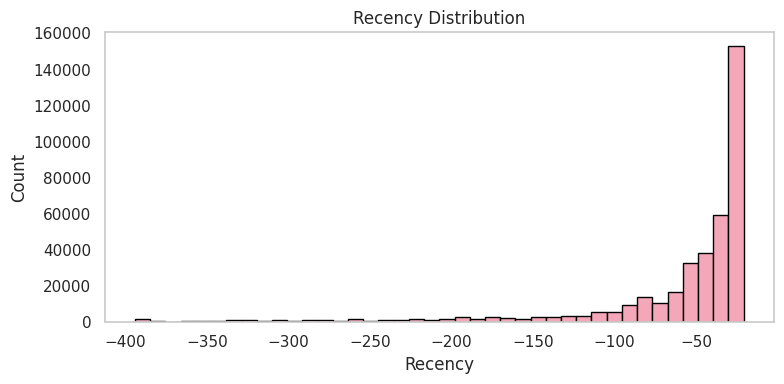

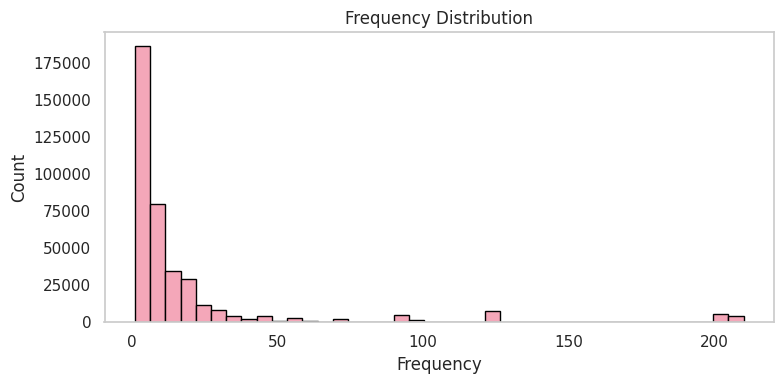

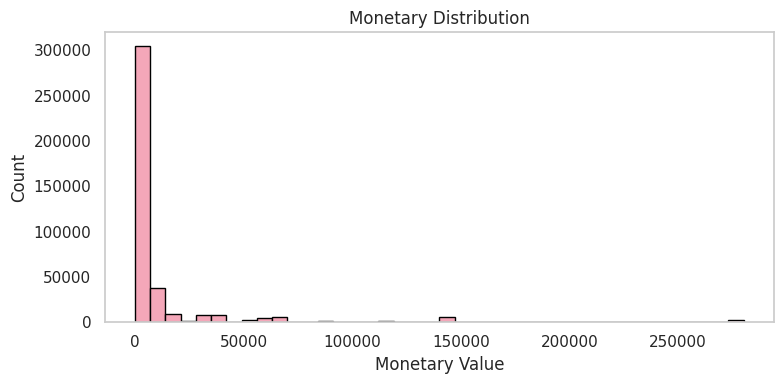

In [37]:
pink = '#F4A7B9'

# Recency
plt.figure(figsize=(8, 4))
invoice_clean['Recency'].hist(bins=40, color=pink, edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.grid(False)
plt.tight_layout()
plt.show()

# Frequency
plt.figure(figsize=(8, 4))
invoice_clean['Frequency'].hist(bins=40, color=pink, edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(False)
plt.tight_layout()
plt.show()

# Monetary
plt.figure(figsize=(8, 4))
invoice_clean['Monetary'].hist(bins=40, color=pink, edgecolor='black')
plt.title('Monetary Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')
plt.grid(False)
plt.tight_layout()
plt.show()

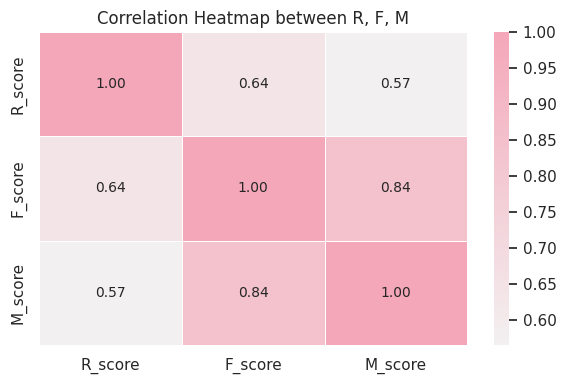

In [39]:
# Tính toán ma trận tương quan
corr = invoice_clean[['R_score', 'F_score', 'M_score']].corr()

# Tạo heatmap với màu hồng
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap=sns.light_palette("#F4A7B9", as_cmap=True), fmt='.2f',
            linewidths=0.5, linecolor='white', annot_kws={"fontsize": 10})
plt.title('Correlation Heatmap between R, F, M', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-42-1032818485.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



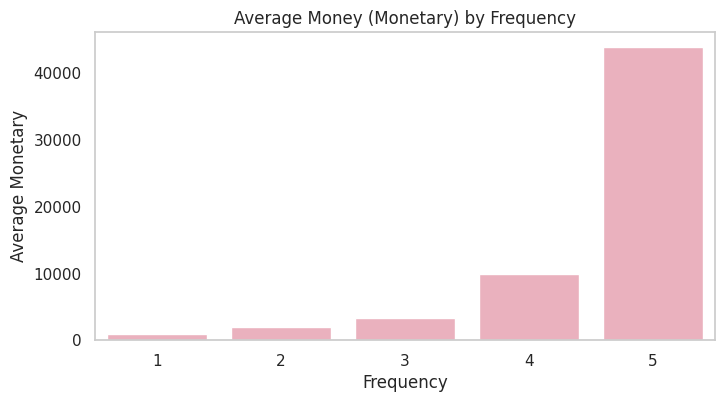

In [42]:
plt.figure(figsize=(8, 4))
sns.barplot(data=invoice_clean.groupby('F_score')['Monetary'].mean().reset_index(), x='F_score', y='Monetary',color='#F4A7B9')
plt.title('Average Money (Monetary) by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Average Monetary')
plt.show()


/tmp/ipython-input-43-1679276004.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



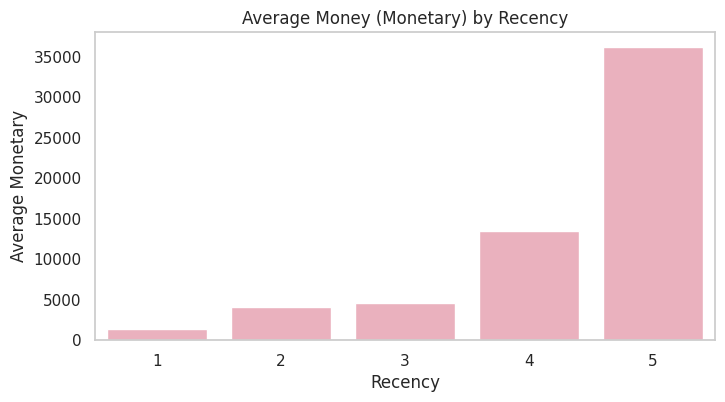

In [43]:
plt.figure(figsize=(8, 4))
sns.barplot(data=invoice_clean.groupby('R_score')['Monetary'].mean().reset_index(), x='R_score', y='Monetary', color='#F4A7B9')
plt.title('Average Money (Monetary) by Recency')
plt.xlabel('Recency')
plt.ylabel('Average Monetary')
plt.show()

/tmp/ipython-input-44-2854557459.py:6: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



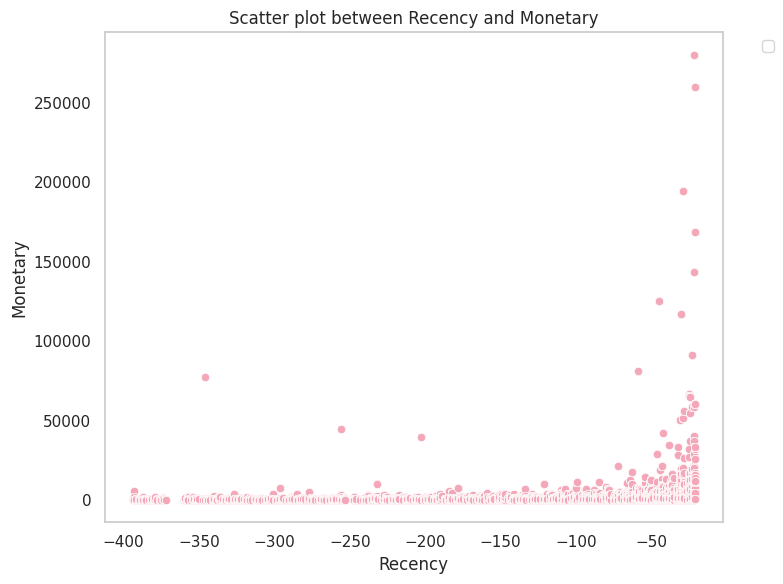

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=invoice_clean, x='Recency', y='Monetary',color='#F4A7B9')
plt.title('Scatter plot between Recency and Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipython-input-45-3823380110.py:6: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



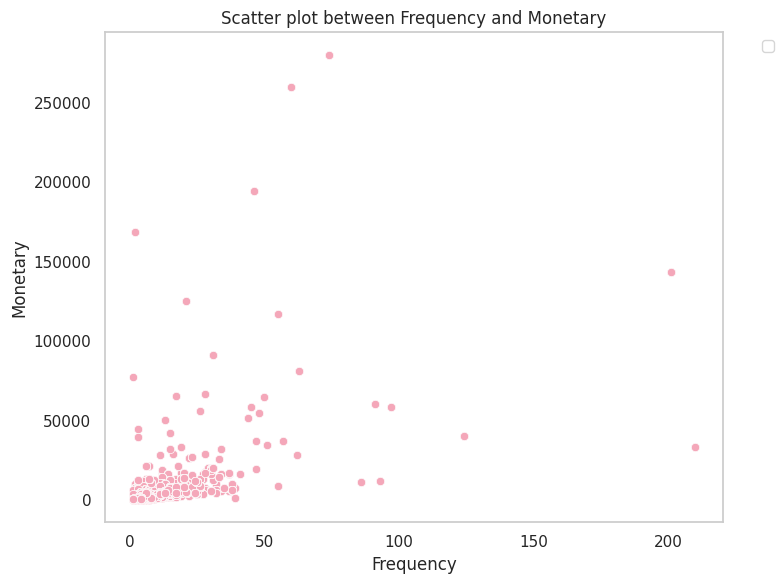

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=invoice_clean, x='Frequency', y='Monetary', color='#F4A7B9')
plt.title('Scatter plot between Frequency and Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Recommedation:**

F_score and M_score have the strongest correlation.

Scatter plot shows that although there is hardly a clear correlation between F and M, there are some data points indicating customer who purchases many times still contribute less money.

--> The marketing department should focus on F & M metrics.

#### Overview Segmentation

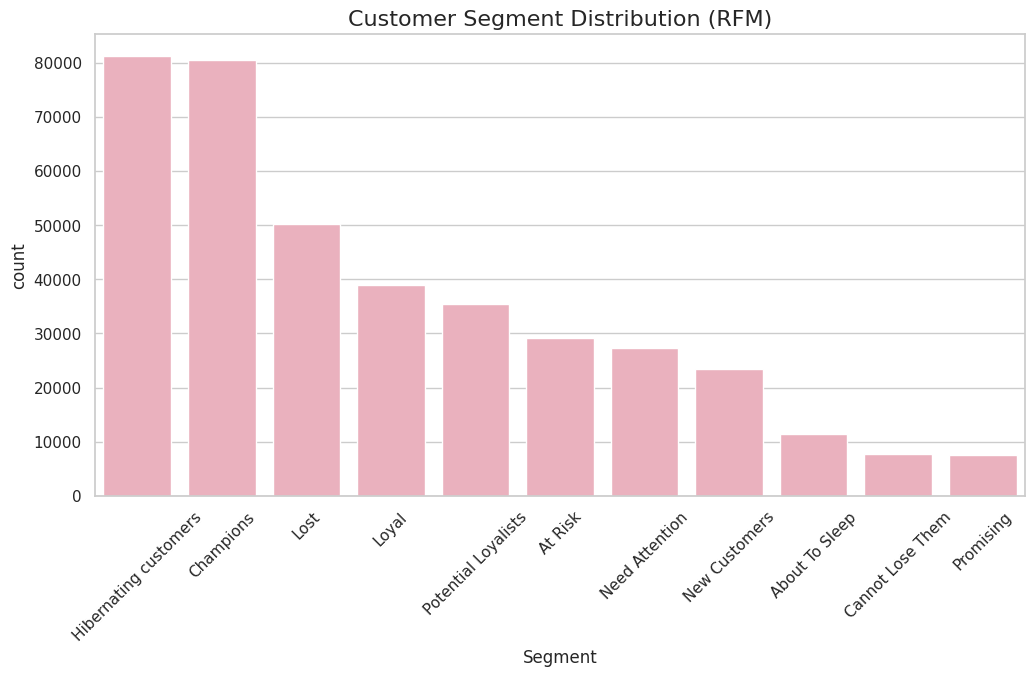

In [46]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=invoice_clean, x='Segment', color='#F4A7B9', order=invoice_clean['Segment'].value_counts().index)
plt.title('Customer Segment Distribution (RFM)', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [27]:
# Calculate Revenue for each Customer Segment
segment_revenue = invoice_clean.groupby('Segment')['Monetary'].sum().reset_index()
segment_revenue = segment_revenue.sort_values(by='Monetary', ascending=True)
segment_revenue['Monetary_Million'] = segment_revenue['Monetary']/1e6
segment_revenue


Segment      Monetary  Monetary_Million
0          About To Sleep  1.288172e+07         12.881723
8           New Customers  1.769358e+07         17.693577
10              Promising  1.909488e+07         19.094881
5                    Lost  3.202967e+07         32.029670
2        Cannot Lose Them  3.291662e+07         32.916625
9     Potential Loyalists  8.465007e+07         84.650068
7          Need Attention  1.197441e+08        119.744105
4   Hibernating customers  1.240278e+08        124.027768
1                 At Risk  2.649614e+08        264.961408
6                   Loyal  3.040457e+08        304.045733
3               Champions  3.531632e+09       3531.631827

/tmp/ipython-input-28-3782804672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=segment_revenue, x='Segment', y='Monetary_Million', palette='pastel')


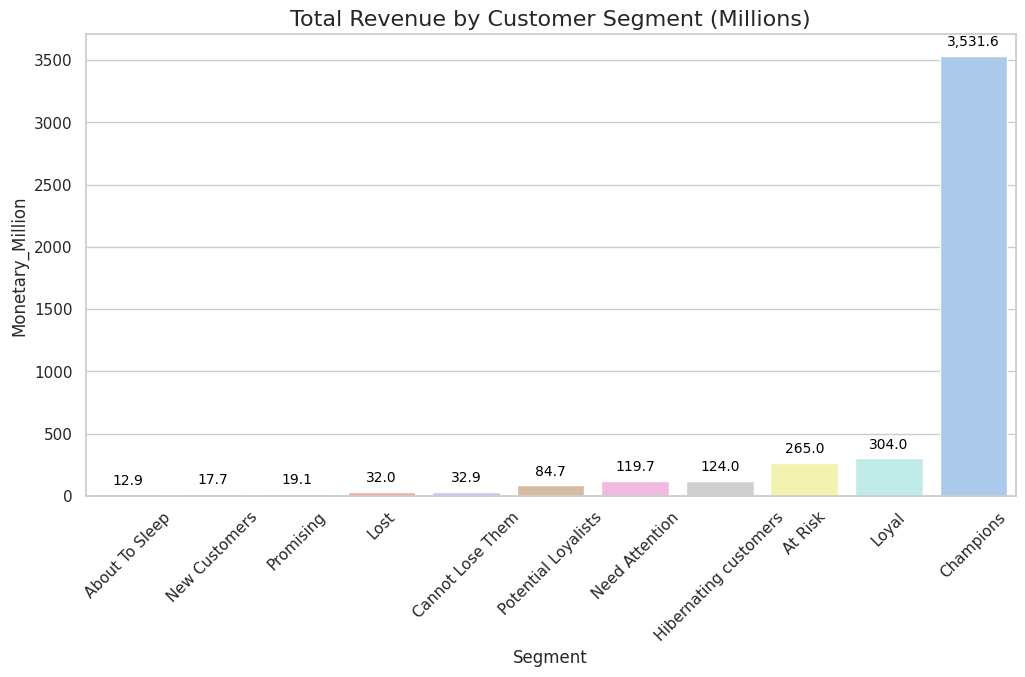

In [28]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=segment_revenue, x='Segment', y='Monetary_Million', palette='pastel')

for p in ax.patches:
    value = f'{p.get_height():,.1f}'  # làm tròn 1 chữ số thập phân, định dạng phân tách hàng nghìn
    ax.annotate(value,
                xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 5),  # offset lên trên
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=10, color='black')

plt.title('Total Revenue by Customer Segment (Millions)', fontsize=16)
plt.xticks(rotation=45)
plt.show()

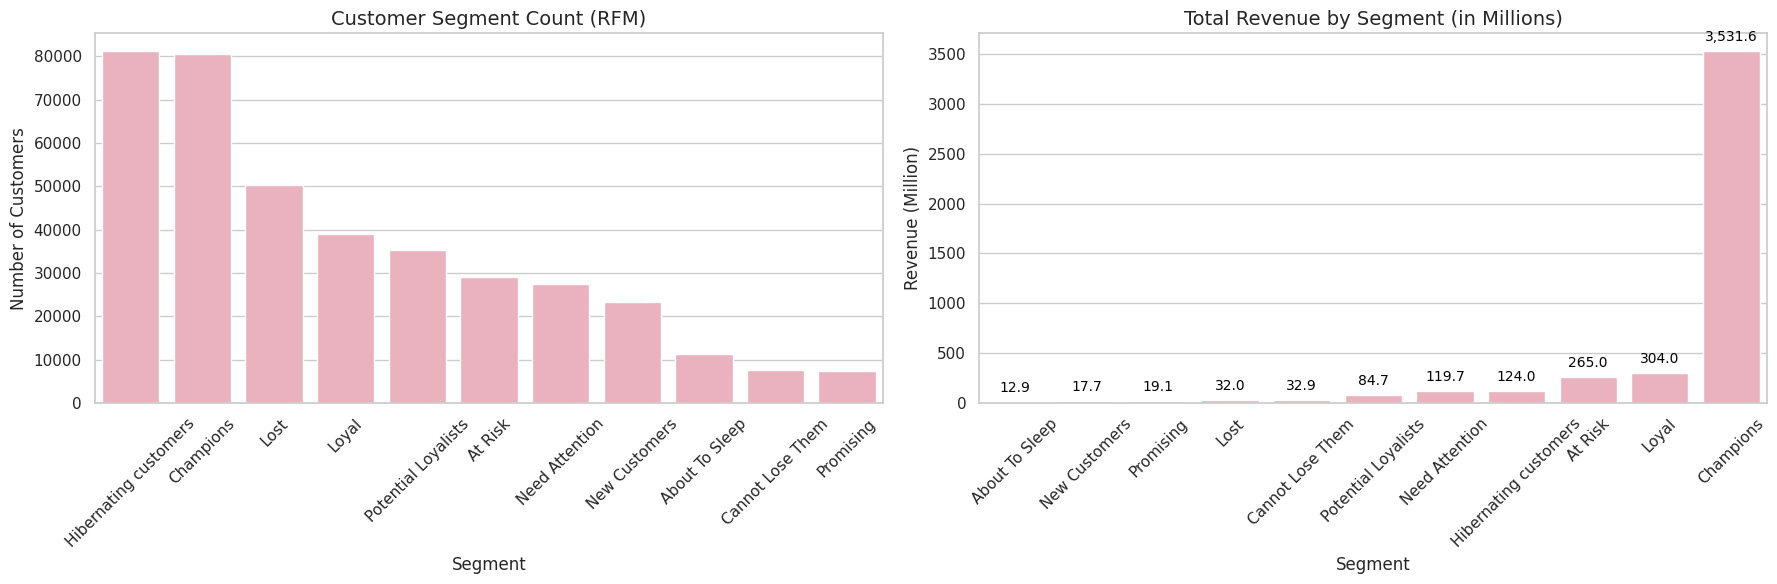

In [33]:
# Set pastel pink as theme color
pink = "#F4A7B9"
sns.set(style="whitegrid")

# Prepare data for countplot (number of customers)
segment_order = invoice_clean['Segment'].value_counts().index

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Bar chart 1: Customer count per segment
sns.countplot(data=invoice_clean, x='Segment', order=segment_order, color=pink, ax=axes[0])
axes[0].set_title('Customer Segment Count (RFM)', fontsize=14)
axes[0].set_xlabel('Segment')
axes[0].set_ylabel('Number of Customers')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart 2: Revenue per segment
sns.barplot(data=segment_revenue, x='Segment', y='Monetary_Million', color=pink, ax=axes[1])

# Add value annotations
for p in axes[1].patches:
    value = f'{p.get_height():,.1f}'
    axes[1].annotate(value,
                     xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                     xytext=(0, 5),
                     textcoords='offset points',
                     ha='center', va='bottom',
                     fontsize=10, color='black')

axes[1].set_title('Total Revenue by Segment (in Millions)', fontsize=14)
axes[1].set_xlabel('Segment')
axes[1].set_ylabel('Revenue (Million)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


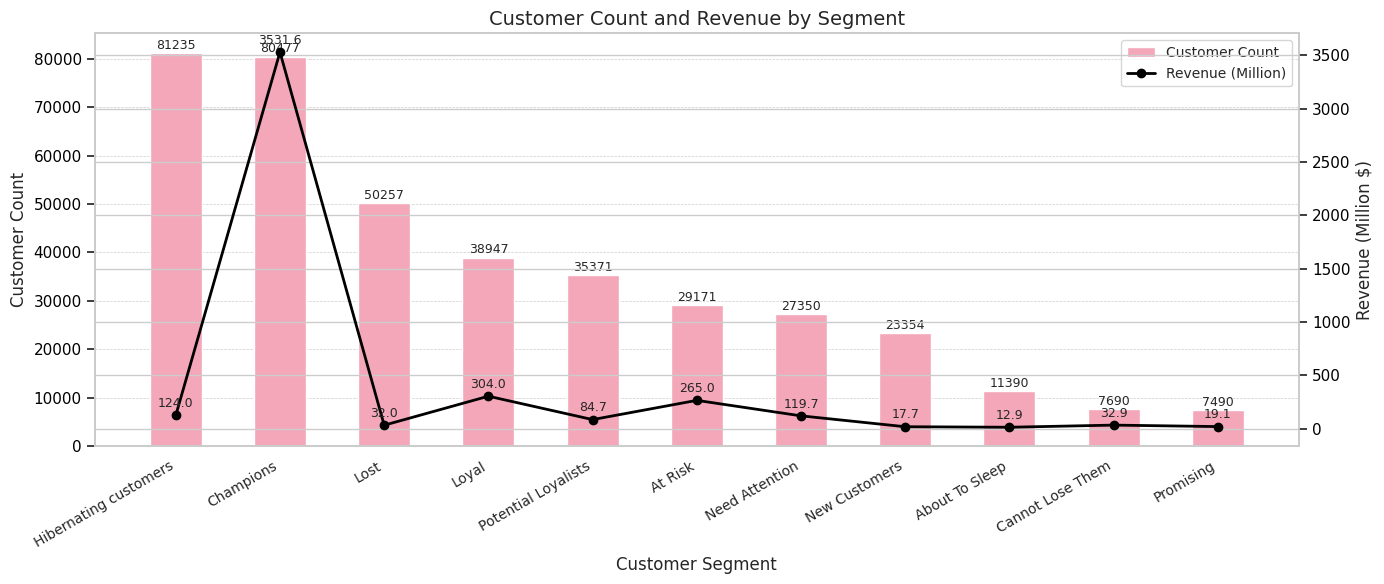

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")
pink = "#F4A7B9"

# Dữ liệu bạn đã tính trước đó
# combined_df = df có các cột: Segment, Customer_Count, Revenue_Million

fig, ax1 = plt.subplots(figsize=(14, 6))

# Bar chart: Customer Count
bar = ax1.bar(combined_df['Segment'], combined_df['Customer_Count'], color=pink, width=0.5, label='Customer Count')
ax1.set_ylabel('Customer Count', fontsize=12)
ax1.set_xlabel('Customer Segment', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(len(combined_df['Segment'])))
ax1.set_xticklabels(combined_df['Segment'], rotation=30, ha='right', fontsize=10)

# Remove minor gridlines
ax1.grid(axis='y', which='major', linestyle='--', linewidth=0.5)
ax1.grid(axis='x', visible=False)

# Line chart: Revenue
ax2 = ax1.twinx()
line = ax2.plot(combined_df['Segment'], combined_df['Revenue_Million'], color='black', marker='o', linewidth=2, label='Revenue (Million)')
ax2.set_ylabel('Revenue (Million $)', fontsize=12)
ax2.tick_params(axis='y', labelcolor='black')

# Annotations for bars
for rect in bar:
    height = rect.get_height()
    ax1.annotate(f'{int(height)}',
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', fontsize=9)

# Annotations for line
for x, y in zip(combined_df['Segment'], combined_df['Revenue_Million']):
    ax2.annotate(f'{y:.1f}', xy=(x, y),
                 xytext=(0, 6), textcoords="offset points",
                 ha='center', fontsize=9)

# Combine legend
lines_labels = [bar, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper right', fontsize=10)

plt.title('Customer Count and Revenue by Segment', fontsize=14)
plt.tight_layout()
#remove all grid
plt.rcParams['axes.grid'] = False
plt.show()


In [49]:
#Select top 3 Country
top_countries = invoice_clean['Country'].value_counts().nlargest(3).index
top_country_data = invoice_clean[invoice_clean['Country'].isin(top_countries)]

import plotly.express as px
# Bước 1: Tạo bảng màu cố định cho từng Segment
segment_list = sorted(invoice_clean['Segment'].unique())
fixed_colors = px.colors.qualitative.Pastel[:len(segment_list)]
segment_color_map = dict(zip(segment_list, fixed_colors))

# Bước 2: Tạo treemap cho từng quốc gia với cùng màu cho cùng segment
for country in top_countries:
    country_data = top_country_data[top_country_data['Country'] == country]

    fig = px.treemap(
        country_data,
        path=['Segment'],
        values='Monetary',
        title=f'Monetary Treemap of Customer Segments in {country}',
        color='Segment',
        color_discrete_map=segment_color_map  # Ánh xạ màu cố định
    )
    fig.show()

In [50]:
#Select top 3 Country
top_countries = invoice_clean['Country'].value_counts().nlargest(3).index
top_country_data = invoice_clean[invoice_clean['Country'].isin(top_countries)]

import plotly.express as px
# Bước 1: Tạo bảng màu cố định cho từng Segment
segment_list = sorted(invoice_clean['Segment'].unique())
fixed_colors = px.colors.qualitative.Pastel[:len(segment_list)]
segment_color_map = dict(zip(segment_list, fixed_colors))

# Bước 2: Tạo treemap cho từng quốc gia với cùng màu cho cùng segment
for country in top_countries:
    country_data = top_country_data[top_country_data['Country'] == country]

    fig = px.treemap(
        country_data,
        path=['Segment'],
        values='Frequency',
        title=f'Frequency Treemap of Customer Segments in {country}',
        color='Segment',
        color_discrete_map=segment_color_map  # Ánh xạ màu cố định
    )
    fig.show()

#### Customer Segment Dive Deep


In [31]:
champion_seg = invoice_clean[invoice_clean['Segment']=='Champions']

In [32]:
rfm_mean = invoice_clean.groupby('Segment')[['Recency','Frequency','Monetary']].mean().reset_index()
rfm_mean = rfm_mean.sort_values(by=['Recency','Frequency','Monetary'],ascending=False)
rfm_mean

Segment     Recency  Frequency      Monetary
3               Champions  -23.449694  65.685413  43883.741029
10              Promising  -26.344326   3.988251   2549.383346
9     Potential Loyalists  -28.778067   7.651890   2393.205380
8           New Customers  -30.202835   2.667423    757.625117
7          Need Attention  -31.306362   9.389031   4378.212263
6                   Loyal  -32.255989  15.624695   7806.653479
0          About To Sleep  -45.559350   3.522476   1130.967796
4   Hibernating customers  -66.285616   4.551967   1526.777474
1                 At Risk  -71.582736  11.067841   9083.041643
2        Cannot Lose Them -135.109363   5.102341   4280.445364
5                    Lost -184.056271   1.963368    637.317590

## 6. Conclusion & Recommendation

1.   The <b>“Champions” and “Loyal”</b> customer groups are contributing a large portion of revenue and have made frequent purchases recently. They are brand lovers and have the ability to spread the word. --> Organize gratitude programs (VIP incentives, gifts) for Champions and Loyal.
2.   Groups like **“At Risk”, “Lost” or “Hibernating”** are customers who used to interact, but are now quiet. Some of them may have forgotten about us, or are waiting for a reason to come back. --> Need a call to action: Send personalized emails and limited-time promotions to activate your At Risk, Lost group.
3. The chart shows that **high spenders are also recent buyers – and vice versa**. This further confirms that retaining existing customers is much more valuable than acquiring new ones.
For high spenders, continue to nurture them: prioritize service, reward points, or personalize product recommendations.
4. The data shows that SuperStore’s three largest markets are the UK, the Netherlands and Germany – and customer behaviour is different in each.
* In the UK, there are a lot of “Champions” and “Loyals” → This is a market ripe for a loyalty programme.
* In Germany, there are a lot of “Hibernating” → Try a focused reactivation campaign, perhaps with a small gift.
* In the Netherlands, there are a lot of “Potential Loyalists” → This is a potential place to convert new customers into loyal customers if nurtured properly.

